# 📌 CASE TÉCNICO – Seleção Vetorial de Cientista de Dados

## Contexto do Case

Uma empresa de tecnologia está contratando um Cientista de Dados Pleno.
Durante a triagem inicial, o RH aplicou um questionário simples:

Em uma escala de 0 a 10, qual seu nível em:
- SQL
- Python
- Machine Learning
<br></br>
Cada candidato virou um vetor em ℝ³:
- v=(SQL, Python, ML)
<br></br>

A empresa quer selecionar o candidato mais próximo do perfil ideal, utilizando apenas matemática vetorial.
Temos:
- 120 candidatos
- 1 vetor ideal da vaga
- Seleção baseada em distância e similaridade

## 01. Gerando os 120 Candidatos

In [12]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_candidatos = 120

candidatos = pd.DataFrame({
    "ID": range(1, n_candidatos + 1),
    "SQL": np.random.randint(0, 11, n_candidatos),
    "Python": np.random.randint(0, 11, n_candidatos),
    "ML": np.random.randint(0, 11, n_candidatos)
})

candidatos["ID"] = candidatos["ID"].apply(lambda x: f"CAND_{x:03d}")
candidatos.head()

,ID,SQL,Python,ML
0,CAND_001,6,4,7
1,CAND_002,3,2,0
2,CAND_003,10,0,10
3,CAND_004,7,4,8
4,CAND_005,4,9,8


## 02. Definindo o Vetor Ideal

In [22]:
vetor_ideal = np.array([9, 9, 8])
print(vetor_ideal)

[9 9 8]


### 🎯 Interpretação Matemática

Esse vetor é um ponto fixo no espaço ℝ³.

Ele representa a “direção estratégica” da vaga.

### 🧠 Interpretação Simplificada

É o candidato perfeito segundo a área técnica.

A partir daqui, todos os candidatos serão comparados com esse ponto.


## 03. Distância Euclidiana

In [14]:
def distancia_euclidiana(v):
    return np.linalg.norm(v - vetor_ideal)

candidatos["distancia"] = candidatos[["SQL","Python","ML"]].apply(
    lambda x: distancia_euclidiana(x.values),
    axis=1
)

candidatos.sort_values("distancia").head()

,ID,SQL,Python,ML,distancia
10,CAND_011,10,9,9,1.414214
48,CAND_049,8,8,8,1.414214
102,CAND_103,9,10,9,1.414214
9,CAND_010,10,9,6,2.236068
42,CAND_043,6,8,8,3.162278


### 🎯 O que isso significa?

Estamos medindo a distância geométrica entre dois pontos no espaço.

### 🧠 Interpretação Simplificada

Quanto menor a distância:
- Mais próximo do perfil ideal
- Melhor o ajuste técnico

Aqui transformamos recrutamento em geometria.


## 04. Subtração (Lacuna Técnica)

In [15]:
melhor = candidatos.sort_values("distancia").iloc[0]

gap = vetor_ideal - melhor[["SQL","Python","ML"]].values
gap

array([np.int32(-1), np.int32(0), np.int32(-1)], dtype=object)

### 🎯 Interpretação Matemática

A subtração gera o vetor deslocamento entre dois pontos.

Esse vetor contém:
- Direção
- Intensidade da diferença

### 🧠 Interpretação Simplificada

Mostra exatamente onde o candidato precisa evoluir.

Se o resultado for:

(2, 1, 0)

Significa:
- Precisa melhorar 2 pontos em SQL
- 1 ponto em Python
- Já atende ML

Subtração vetorial = diagnóstico técnico.


## 05. Produto Escalar

In [16]:
def produto_escalar(v):
    """
        Agora calculamos o produto escalar entre cada candidato e o vetor ideal.
    """
    return np.dot(v, vetor_ideal)

candidatos["produto_escalar"] = candidatos[["SQL","Python","ML"]].apply(
    lambda x: produto_escalar(x.values),
    axis=1
)

candidatos.sort_values("produto_escalar", ascending=False).head()
candidatos

,ID,SQL,Python,ML,distancia,produto_escalar
0,CAND_001,6,4,7,5.916080,146
1,CAND_002,3,2,0,12.206556,45
2,CAND_003,10,0,10,9.273618,170
3,CAND_004,7,4,8,5.385165,163
4,CAND_005,4,9,8,5.000000,181
...,...,...,...,...,...,...
115,CAND_116,5,8,7,4.242641,173
116,CAND_117,10,0,0,12.083046,90
117,CAND_118,2,7,8,7.280110,145
118,CAND_119,0,6,10,9.695360,134


### 🎯 Interpretação Matemática

O produto escalar mede o alinhamento entre vetores.

Ele está relacionado ao ângulo entre eles.

### 🧠 Interpretação Simplificada

Quanto maior o valor:
- Mais alinhado o candidato está com o perfil ideal
- Menor o ângulo entre os vetores

Aqui não medimos distância.
Medimos direção estratégica.

## 06. Multiplicação por Componente (com pesos)

In [17]:
pesos = np.array([1, 1, 2])

candidatos["ponderado"] = candidatos[["SQL","Python","ML"]].apply(
    lambda x: np.sum(x.values * pesos),
    axis=1
)

candidatos.sort_values("ponderado", ascending=False).head()
candidatos

,ID,SQL,Python,ML,distancia,produto_escalar,ponderado
0,CAND_001,6,4,7,5.916080,146,24
1,CAND_002,3,2,0,12.206556,45,5
2,CAND_003,10,0,10,9.273618,170,30
3,CAND_004,7,4,8,5.385165,163,27
4,CAND_005,4,9,8,5.000000,181,29
...,...,...,...,...,...,...,...
115,CAND_116,5,8,7,4.242641,173,27
116,CAND_117,10,0,0,12.083046,90,10
117,CAND_118,2,7,8,7.280110,145,25
118,CAND_119,0,6,10,9.695360,134,26


### 🎯 Interpretação Matemática

Essa operação é chamada de Produto de Hadamard.

Multiplicamos componente por componente.

### 🧠 Interpretação Simplificada

Estamos dizendo que algumas habilidades são mais importantes que outras.

Neste caso:
- ML recebe peso 2
- SQL e Python peso 1

Isso altera a relevância das dimensões no processo de seleção.


## 07. Soma de Vetores (Formando Dupla)

In [18]:
cand1 = candidatos.iloc[0][["SQL","Python","ML"]].values
cand2 = candidatos.iloc[1][["SQL","Python","ML"]].values

time = cand1 + cand2
time


array([np.int32(9), np.int32(6), np.int32(7)], dtype=object)

In [19]:
# Ordenando por menor distância
melhor_candidato = candidatos.sort_values("distancia").iloc[0]

print("Melhor candidato encontrado:")
print(f"ID: {melhor_candidato['ID']}")
print(f"SQL: {melhor_candidato['SQL']}")
print(f"Python: {melhor_candidato['Python']}")
print(f"ML: {melhor_candidato['ML']}")
print(f"Distância até o ideal: {melhor_candidato['distancia']:.4f}")

Melhor candidato encontrado:
ID: CAND_011
SQL: 10
Python: 9
ML: 9
Distância até o ideal: 1.4142


### 🧠 Interpretação Simplificada

- O candidato escolhido é o ponto mais próximo do ideal no espaço tridimensional.


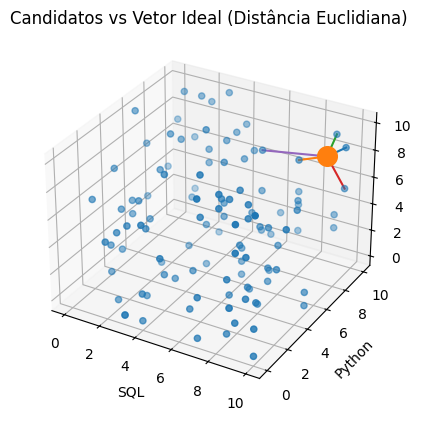

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Selecionando Top 5 mais próximos
top5 = candidatos.sort_values("distancia").head(5)

# -------------------------------
# 4. Plot 3D
# -------------------------------
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotando todos os candidatos
ax.scatter(
    candidatos["SQL"],
    candidatos["Python"],
    candidatos["ML"]
)

# Plotando ponto ideal
ax.scatter(
    vetor_ideal[0],
    vetor_ideal[1],
    vetor_ideal[2],
    s=200
)

# Ligando ideal aos Top 5
for _, row in top5.iterrows():
    ax.plot(
        [vetor_ideal[0], row["SQL"]],
        [vetor_ideal[1], row["Python"]],
        [vetor_ideal[2], row["ML"]]
    )

# Labels
ax.set_xlabel("SQL")
ax.set_ylabel("Python")
ax.set_zlabel("ML")

plt.title("Candidatos vs Vetor Ideal (Distância Euclidiana)")
plt.show()


In [21]:
# Destacando melhor candidato no gráfico
ax.scatter(
    melhor_candidato["SQL"],
    melhor_candidato["Python"],
    melhor_candidato["ML"],
    s=150
)

ax.text(
    melhor_candidato["SQL"],
    melhor_candidato["Python"],
    melhor_candidato["ML"],
    f"ID {melhor_candidato['ID']}"
)

Text(10, 9, 'ID CAND_011')